In [1]:
import matplotlib.pyplot as plt
import numpy as np
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.hydro import compute_conservatives
from fvhoe.initial_conditions import slotted_disk
from fvhoe.solver import EulerSolver

In [2]:
def px(x, y, z):
    yc = y - 0.5
    return -yc


def py(x, y, z):
    xc = x - 0.5
    return xc


def E(x, y, z):
    xc = x - 0.5
    yc = y - 0.5
    return 1 / (5 / 3 - 1) + 0.5 * (xc**2 + yc**2)


solver = EulerSolver(
    w0=slotted_disk,
    nx=32,
    ny=32,
    px=3,
    py=3,
    bc=BoundaryCondition(
        x="dirichlet",
        y="x",
        x_value={"rho": 1, "E": E, "px": px, "py": py, "pz": 0},
        y_value="x",
    ),
    riemann_solver="advection_upwind",
    CFL=0.1,
    cupy=True,
)

In [3]:
solver.rkorder(0.05)

  0%|          | 0/0.05 [00:00]

100%|██████████| 0.05/0.05 [00:05]                 


t=0.05, x=[0.02, 0.98], y=[0.02, 0.98], z=0.50
horizontal_axis='x', vertical_axis='y'


Text(0, 0.5, '$y$')

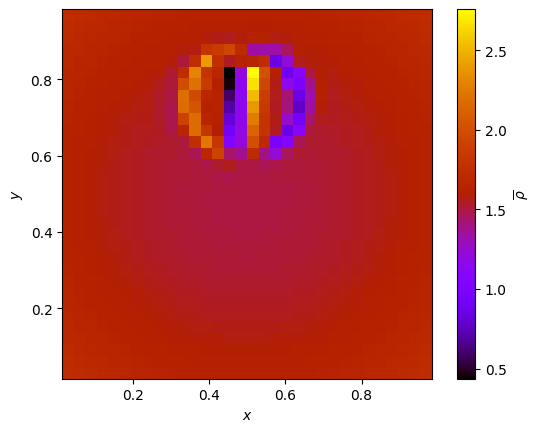

In [6]:
fig, ax = plt.subplots()

param = "E"
im = solver.plot_2d_slice(ax, t=0.15, param=param, cmap="gnuplot", z=0.5)
fig.colorbar(im, ax=ax, label=r"$\overline{\rho}$")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

In [5]:
for t in [0, 1]:
    m_tot = np.sum(solver.snapshots[0]["fv"].rho[:, 0, 0]) * (
        solver.h[0] * solver.h[1] * solver.h[2]
    )
    print(f"Total mass at time {t}: {m_tot}")

Total mass at time 0: 0.03125
Total mass at time 1: 0.03125
